In [118]:
import sys
sys.path.append('../..')

import random
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from utils.quantum_circuit import prepare_state, simulate, calculate_fidelity, get_state_vector, draw_state

Alice wants to use SARG04 protocol to send a secret to Bob.

Alice starts with preparing 2 strings:
- $x = 101$ that represent the actual information she wants to send to Bob
- $y = 101$ that tells Alice which bases to apply on each bit of $x$

Bob prepares a random $\overline{y} = 100$ ($q_6, q_7, q_8$) basis state that is also n-qubits long, and use that state to measure each $x_i$ based $\overline{y}_i$ basis

Both Bob and Alice know that each qubit is encoded in one of 2 basis:
- $H$ basis if $y = 1$
- $Z$ basis if $y = 0$

In [ ]:
x = "101"
y = "101"
y_prime = "100"
y_eve = "010"

In [120]:
qubits = {
    # Alice information qubits
    "q0": QuantumRegister(1, "q0"),
    "q1": QuantumRegister(1, "q1"),
    "q2": QuantumRegister(1, "q2"),
    
    # Alice bases qubits
    "q3": QuantumRegister(1, "q3"),
    "q4": QuantumRegister(1, "q4"),
    "q5": QuantumRegister(1, "q5"),

    # Bob basis qubits
    "q6": QuantumRegister(1, "q6"),
    "q7": QuantumRegister(1, "q7"),
    "q8": QuantumRegister(1, "q8"),

    # Eve basis qubits
    "q9": QuantumRegister(1, "q9"),
    "q10": QuantumRegister(1, "q10"),
    "q11": QuantumRegister(1, "q11"),

    # Output
    "bob_output": ClassicalRegister(3, "Bob Output"),
    "eve_output": ClassicalRegister(3, "Eve Output")
}

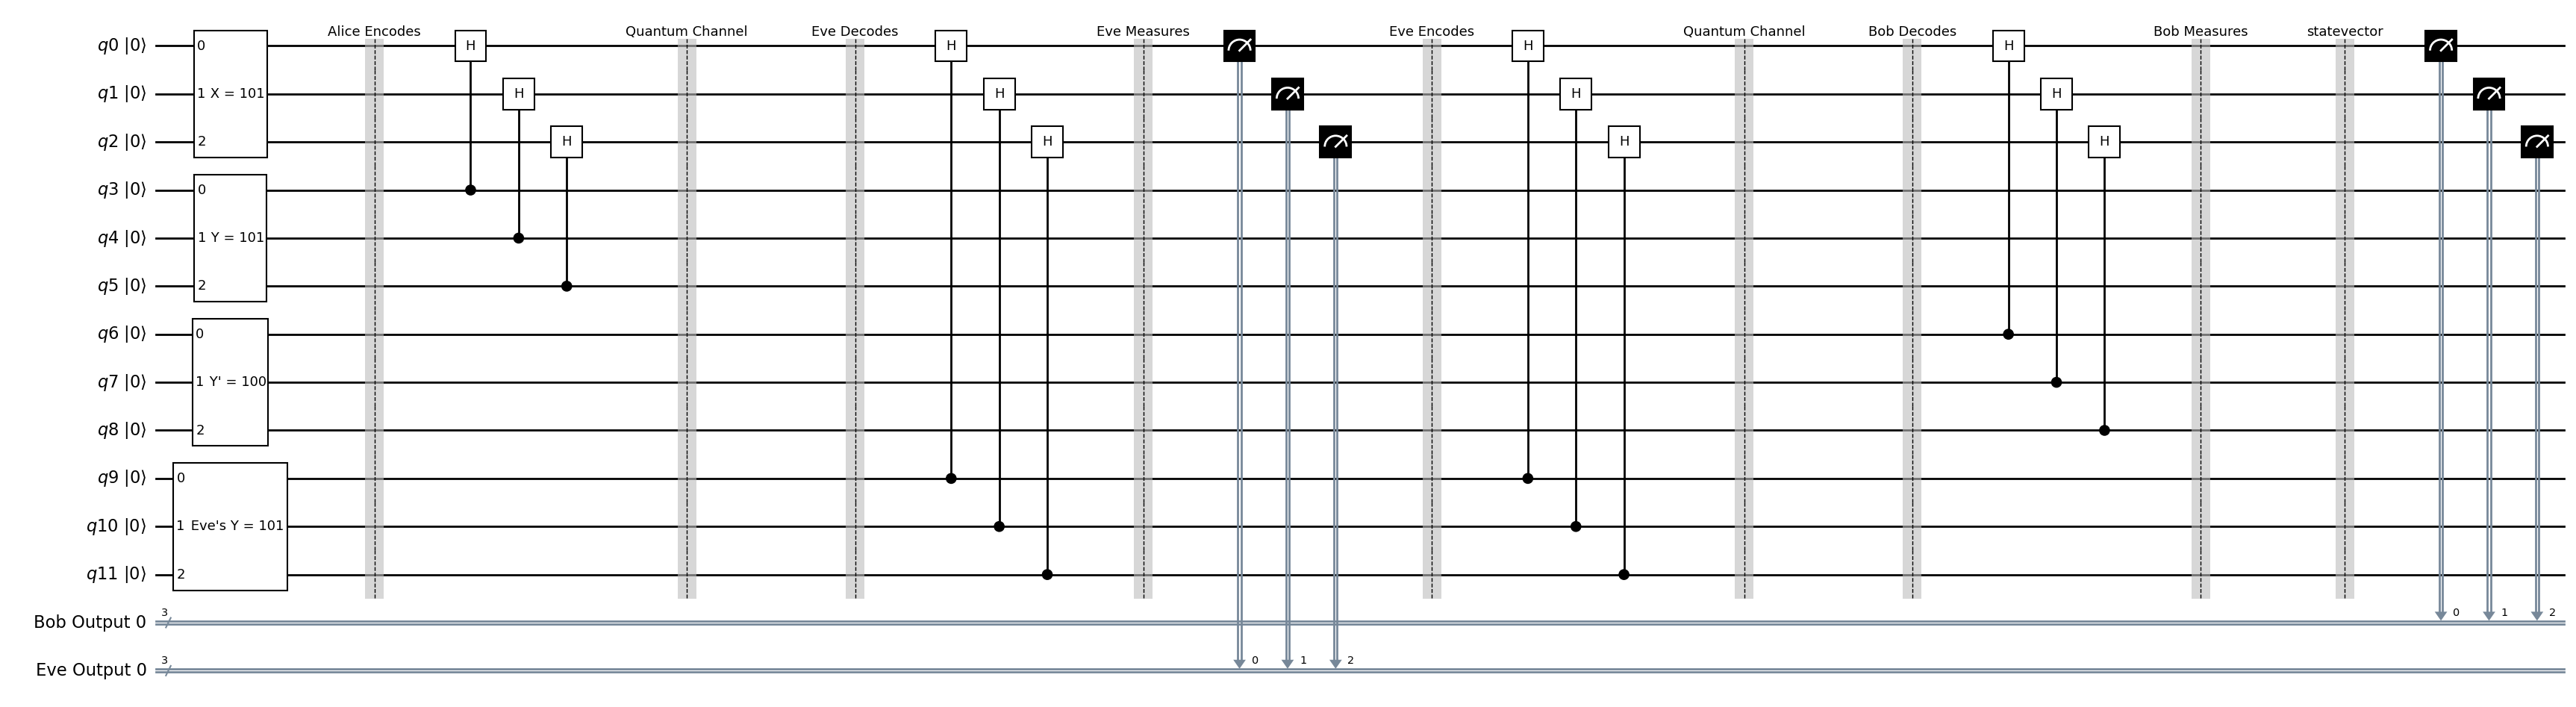

In [121]:
qc = QuantumCircuit(*qubits.values())

# prepare information state for Alice
qc.append(prepare_state(x, f" X = {x}"), [0, 1, 2])

# prepare basis state 101 for Alice
qc.append(prepare_state(y, f" Y = {y}"), [3, 4, 5])

# prepare reference basis state for Bob
qc.append(prepare_state(y_prime, f" Y' = {y_prime}"), [6, 7, 8])

# prepare reference basis state for Eve
qc.append(prepare_state(y_prime, f" Eve's Y = {y_eve}"), [9, 10, 11])

initial_state = get_state_vector(qc)

qc.barrier(label="Alice Encodes")

# Alice encodes information state based on basis state
# Encoding
qc.ch(qubits["q3"], qubits["q0"])
qc.ch(qubits["q4"], qubits["q1"])
qc.ch(qubits["q5"], qubits["q2"])

qc.barrier(label="Quantum Channel")
qc.barrier(label="Eve Decodes")

qc.ch(qubits["q9"], qubits["q0"])
qc.ch(qubits["q10"], qubits["q1"])
qc.ch(qubits["q11"], qubits["q2"])

qc.barrier(label="Eve Measures")

qc.measure([0, 1, 2], qubits["eve_output"])

qc.barrier(label="Eve Encodes")

qc.ch(qubits["q9"], qubits["q0"])
qc.ch(qubits["q10"], qubits["q1"])
qc.ch(qubits["q11"], qubits["q2"])

qc.barrier(label="Quantum Channel")
qc.barrier(label="Bob Decodes")

# Bob tries to measure information state based on his basis state
# Decoding
qc.ch(qubits["q6"], qubits["q0"])
qc.ch(qubits["q7"], qubits["q1"])
qc.ch(qubits["q8"], qubits["q2"])

qc.barrier(label="Bob Measures")

qc.save_statevector()
qc.measure([0, 1, 2], qubits["bob_output"])

qc.draw("mpl", style="bw", fold=-1, initial_state=True)

In [122]:
result = simulate(qc)

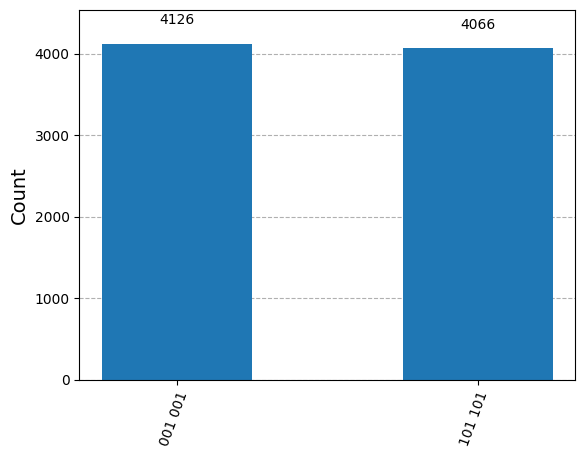

In [123]:
plot_histogram(result.get_counts())

In [124]:
draw_state(initial_state)

<IPython.core.display.Latex object>

In [125]:
last_state = result.get_statevector()
draw_state(last_state)

<IPython.core.display.Latex object>

In [126]:
calculate_fidelity(initial_state, last_state)

0.0